In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import adjusted_rand_score, confusion_matrix

In [ ]:
iris = load_iris()

print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)

display(X_scaled.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


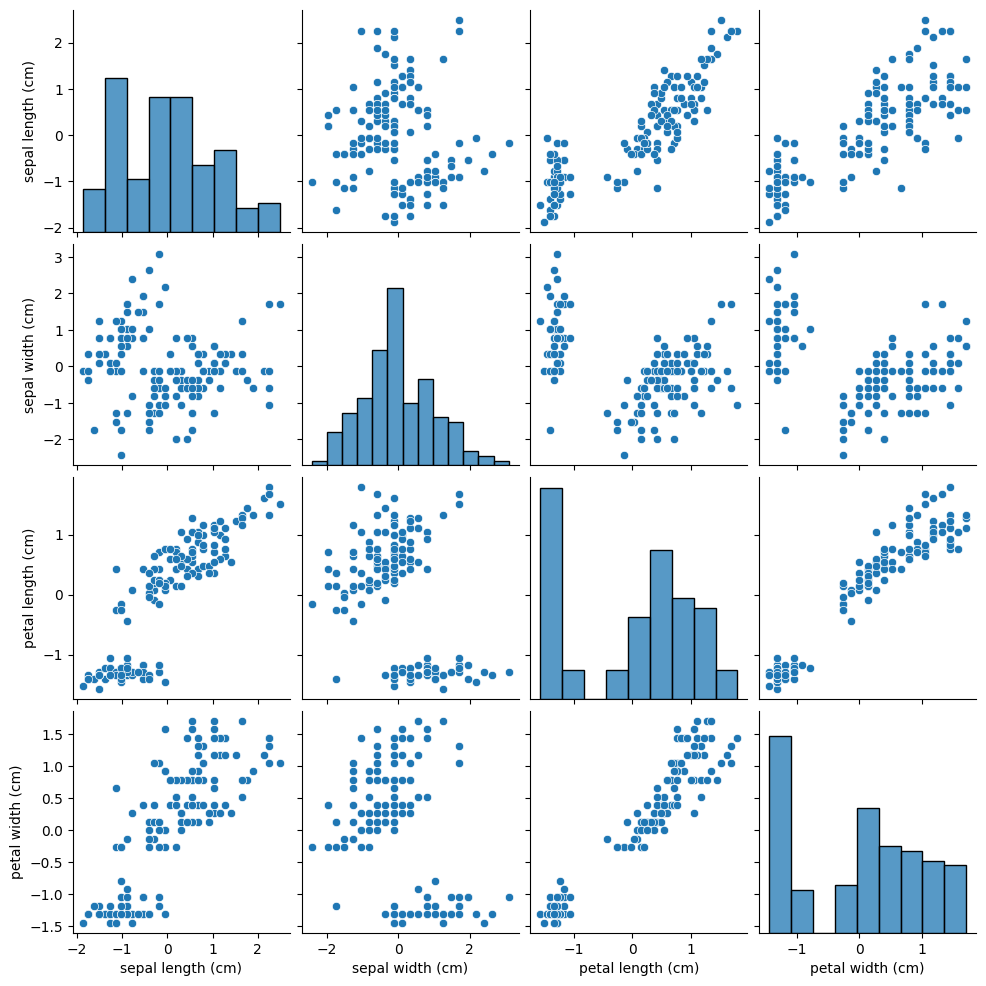

In [ ]:
display(X_scaled.describe())
sns.pairplot(X_scaled)

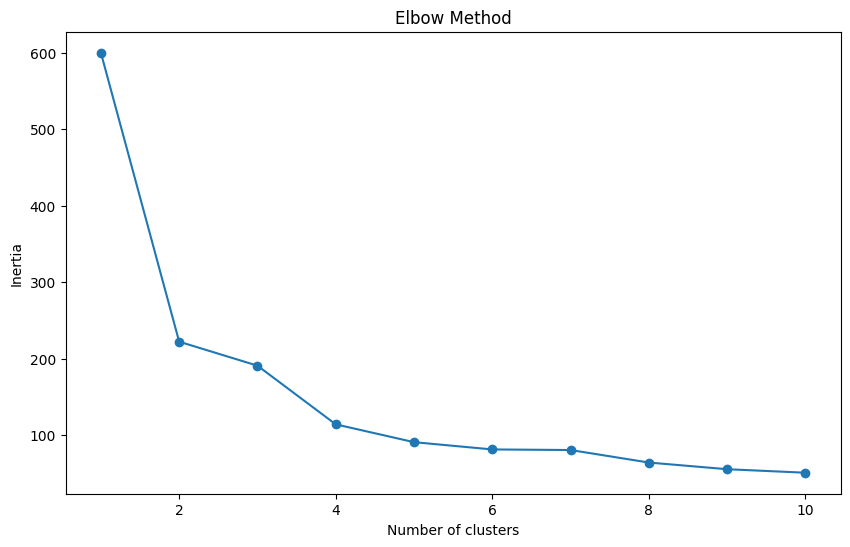

In [ ]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

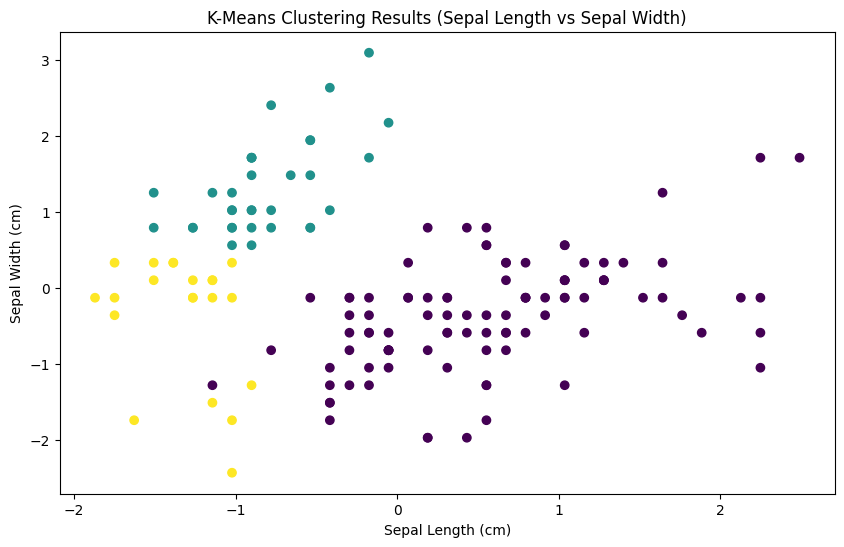

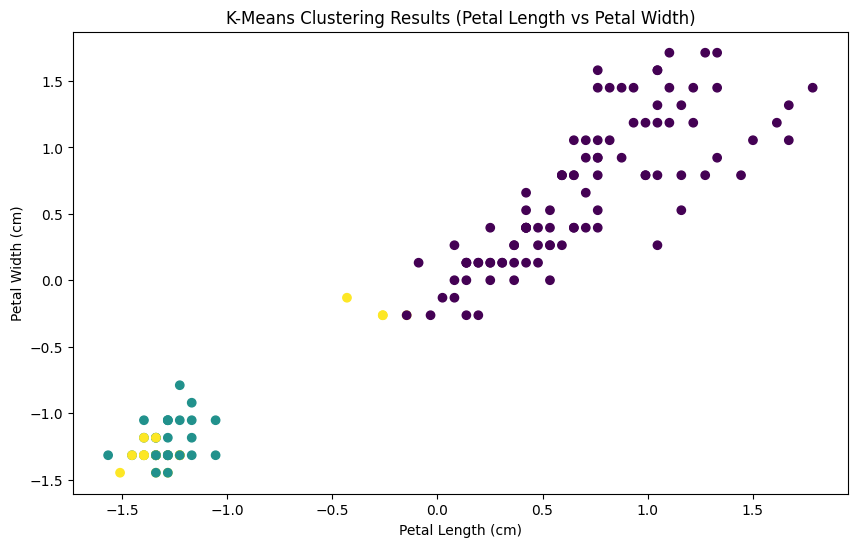

In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled['sepal length (cm)'], X_scaled['sepal width (cm)'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering Results (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled['petal length (cm)'], X_scaled['petal width (cm)'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering Results (Petal Length vs Petal Width)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

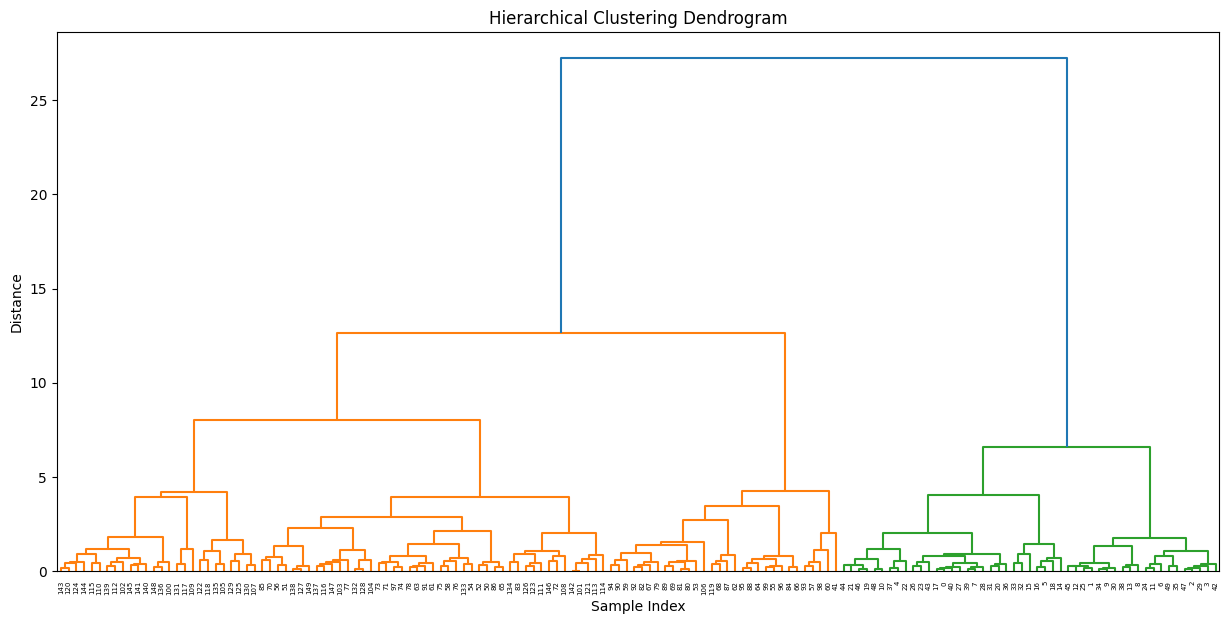

In [ ]:
linked = linkage(X_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

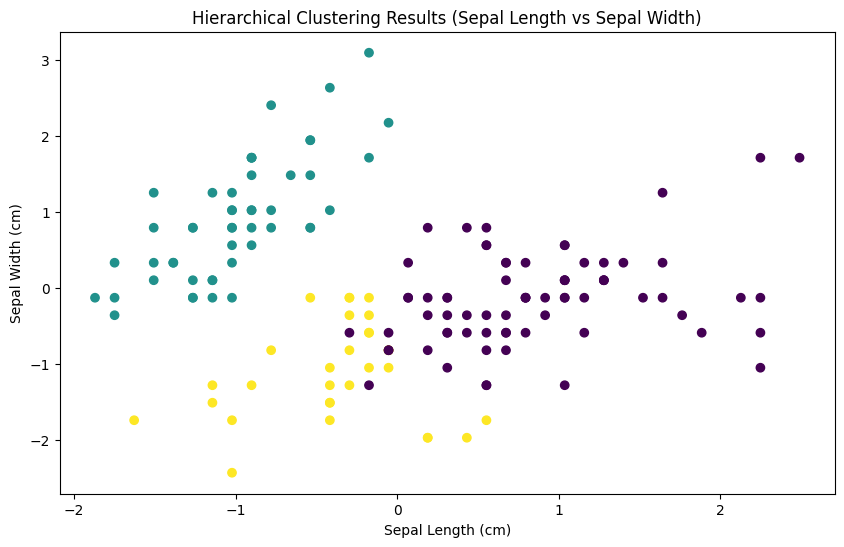

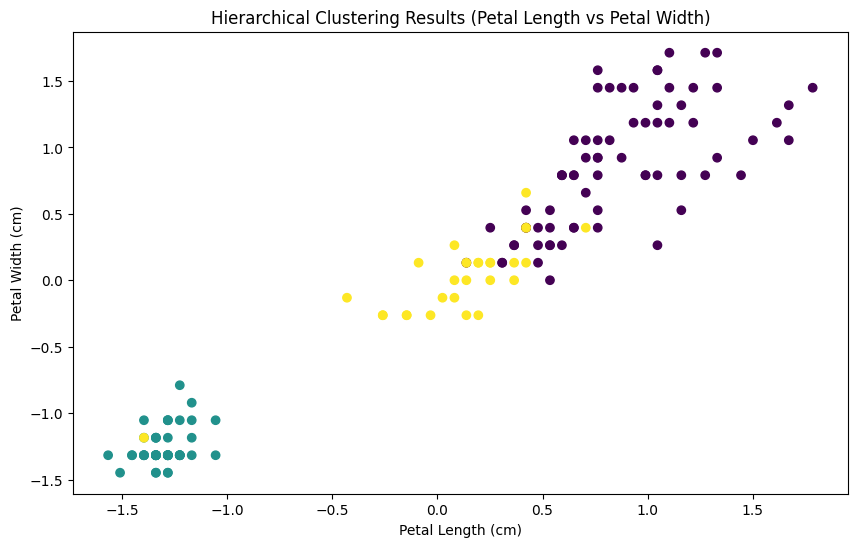

In [ ]:
n_clusters_hierarchical = 3
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters_hierarchical, metric='euclidean') #LEARN
hierarchical_labels = hierarchical_clustering.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled['sepal length (cm)'], X_scaled['sepal width (cm)'], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering Results (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled['petal length (cm)'], X_scaled['petal width (cm)'], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering Results (Petal Length vs Petal Width)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

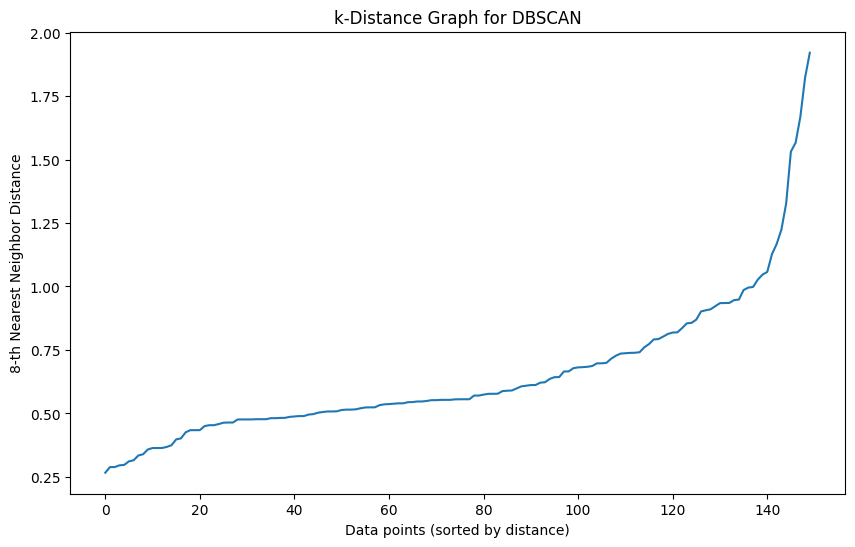

In [ ]:
k = 2 * X_scaled.shape[1]

neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(X_scaled)

k_distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title('k-Distance Graph for DBSCAN')
plt.xlabel('Data points (sorted by distance)')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.show()

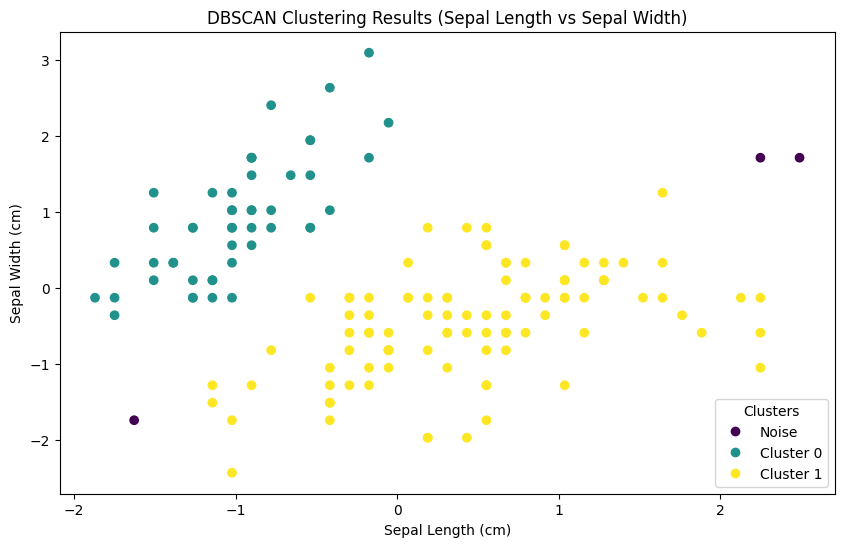

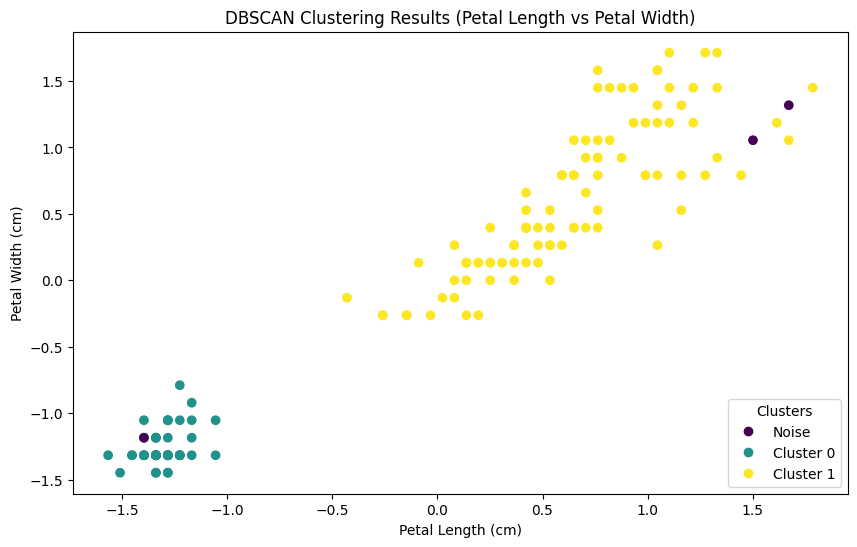

In [ ]:
epsilon = 1.00
min_samples = k

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled['sepal length (cm)'], X_scaled['sepal width (cm)'], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering Results (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
legend_elements = scatter.legend_elements()[0]
legend_labels = [f'Cluster {i}' if i != -1 else 'Noise' for i in np.unique(dbscan_labels)]
plt.legend(legend_elements, legend_labels, loc='lower right', title='Clusters')
plt.show()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled['petal length (cm)'], X_scaled['petal width (cm)'], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering Results (Petal Length vs Petal Width)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
legend_elements = scatter.legend_elements()[0]
legend_labels = [f'Cluster {i}' if i != -1 else 'Noise' for i in np.unique(dbscan_labels)]
plt.legend(legend_elements, legend_labels, loc='lower right', title='Clusters')
plt.show()

In [ ]:
y_true = iris.target

In [ ]:
ari_kmeans = adjusted_rand_score(y_true, cluster_labels)
ari_hierarchical = adjusted_rand_score(y_true, hierarchical_labels)
ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)

print(f"Adjusted Rand Score (K-Means): {ari_kmeans}")
print(f"Adjusted Rand Score (Hierarchical Clustering): {ari_hierarchical}")
print(f"Adjusted Rand Score (DBSCAN): {ari_dbscan}")

Adjusted Rand Score (K-Means): 0.432804702527474
Adjusted Rand Score (Hierarchical Clustering): 0.6153229932145449
Adjusted Rand Score (DBSCAN): 0.5535820784912958


In [ ]:
conf_matrix_kmeans = confusion_matrix(y_true, cluster_labels)
conf_matrix_hierarchical = confusion_matrix(y_true, hierarchical_labels)
conf_matrix_dbscan = confusion_matrix(y_true, dbscan_labels)

print("\nConfusion Matrix (K-Means):")
display(conf_matrix_kmeans)

print("\nConfusion Matrix (Hierarchical Clustering):")
display(conf_matrix_hierarchical)

print("\nConfusion Matrix (DBSCAN):")
display(conf_matrix_dbscan)


Confusion Matrix (K-Means):


array([[ 0, 33, 17],
       [46,  0,  4],
       [50,  0,  0]])


Confusion Matrix (Hierarchical Clustering):


array([[ 0, 49,  1],
       [23,  0, 27],
       [48,  0,  2]])


Confusion Matrix (DBSCAN):


array([[ 0,  0,  0,  0],
       [ 1, 49,  0,  0],
       [ 0,  0, 50,  0],
       [ 2,  0, 48,  0]])